## Recommender System - Movie rating dataset
* https://grouplens.org/datasets/movielens/

In [1]:
# User based collaborative filtering:
    # User taste changed over time
    # # of people >> # of items (Amazon sells 120mn products to billions of people)
    # can be gamed - shilling attack
# Item based collaborative filtering:
    # Items don't change
    # computationally less expensive
    # harder to game

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
r_cols = ['user_id', 'movie_id','rating']
ratings = pd.read_csv('../../github/python-ML/data/u.data', sep='\t', names=r_cols, usecols=range(3))

In [4]:
m_cols = ['movie_id', 'title']
movies = pd.read_csv('../../github/python-ML/data/u.item', sep='|', names=m_cols, usecols=range(2), encoding='latin-1')

In [5]:
ratings = pd.merge(movies, ratings)
ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


## User-based collaborative filtering

In [6]:
user_mat = ratings.pivot_table(index=['title'], columns=['user_id'], values='rating')
display(user_mat.shape)
user_mat.head()

(1664, 944)

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,5.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
user_corr = user_mat.corr(method='spearman', min_periods=25)
user_corr.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,0.421702,0.276683,0.159879,0.468942,NaN,...,0.131767,NaN,0.241311,NaN,0.391978,NaN,0.267328,NaN,-0.178844,0.078123
2,NaN,NaN,1.0,NaN,NaN,NaN,0.457493,NaN,NaN,NaN,...,NaN,NaN,0.201611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
user_similarity = user_corr.loc[1].dropna()
user_similarity = user_similarity[user_similarity>0.4]
user_similarity

user_id
1      1.000000
5      0.421702
8      0.468942
13     0.401529
21     0.521178
         ...   
880    0.442632
886    0.436533
893    0.406515
910    0.401121
916    0.411391
Name: 1, Length: 63, dtype: float64

In [9]:
user_mat_for_similar_users = user_mat[user_similarity.index]
user_mat_for_similar_users.shape

(1664, 63)

In [10]:
recommended_movies = user_mat_for_similar_users * user_similarity
recommended_movies.head()

user_id,1,5,8,13,21,22,28,44,57,60,...,757,773,776,782,868,880,886,893,910,916
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.823262,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),2.0,0.843403,NaN,0.803059,NaN,NaN,NaN,NaN,1.699669,1.221488,...,NaN,NaN,NaN,NaN,0.498789,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),5.0,NaN,NaN,1.606117,NaN,NaN,NaN,NaN,NaN,2.035814,...,NaN,NaN,NaN,NaN,2.493947,NaN,2.182663,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,2.084712,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.646525,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
seen_movies = user_mat.loc[:,1].dropna().index
seen_movies

Index(['101 Dalmatians (1996)', '12 Angry Men (1957)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)',
       'Air Bud (1997)', 'Akira (1988)', 'Aladdin (1992)', 'Alien (1979)',
       ...
       'When Harry Met Sally... (1989)',
       'When the Cats Away (Chacun cherche son chat) (1996)',
       'While You Were Sleeping (1995)', 'White Balloon, The (1995)',
       'Willy Wonka and the Chocolate Factory (1971)',
       'Wizard of Oz, The (1939)', 'Wrong Trousers, The (1993)',
       'Young Frankenstein (1974)', 'Young Guns (1988)', 'unknown'],
      dtype='object', name='title', length=271)

In [12]:
recommended_movies = recommended_movies.drop(seen_movies)
recommended_movies.mean(axis=1).dropna().sort_values(ascending=False).head(10)

title
Underground (1995)                                                    2.369871
Faust (1994)                                                          2.281785
Vanya on 42nd Street (1994)                                           2.270301
Little Princess, A (1995)                                             2.212851
Burnt By the Sun (1994)                                               2.210534
Withnail and I (1987)                                                 2.210534
Notorious (1946)                                                      2.209642
Double vie de Véronique, La (Double Life of Veronique, The) (1991)    2.193842
Stranger, The (1994)                                                  2.193698
Secrets & Lies (1996)                                                 2.192489
dtype: float64

In [13]:
recommended_movies.loc['Underground (1995)'].dropna().mean()

2.369871248318792

In [14]:
# Testing Matrix x Series multiplication
# mat = pd.DataFrame(data=dict(A=[1, np.nan, 3], B=[3,2, 1]))
# display(mat)
# corr = pd.Series(index=['A', 'B'], data=[1, 0.5])
# display(corr)

# mat * corr

In [15]:
def user_based_suggestion(user_id, user_mat=user_mat, n=10):
    sim_candidates = pd.Series(dtype='float64')
    
    # User correlation matrix from user rating matrix
    user_corr = user_mat.corr(method='spearman', min_periods=25)
    
    # Users similar to given_user
    user_similarity = user_corr.loc[user_id].dropna()
    
    # Filter to keep only +vely correlated users with correlation > 0.4
    user_similarity = user_similarity[user_similarity>0.4]
    
    # Subset user matrix for similar users
    user_mat_for_similar_users = user_mat[user_similarity.index]
    
    # Multiple individiaul users ratings with their correlation value to given_user
    recommended_movies = user_mat_for_similar_users * user_similarity
    
    # Remove movies already seen by given_user
    seen_movies = user_mat.loc[:,user_id].dropna().index
    recommended_movies = recommended_movies.drop(seen_movies)
    
    # Calculating average score and printing top results
    print(recommended_movies.mean(axis=1).dropna().sort_values(ascending=False).head(n))

In [16]:
user_based_suggestion(1)

title
Underground (1995)                                                    2.369871
Faust (1994)                                                          2.281785
Vanya on 42nd Street (1994)                                           2.270301
Little Princess, A (1995)                                             2.212851
Burnt By the Sun (1994)                                               2.210534
Withnail and I (1987)                                                 2.210534
Notorious (1946)                                                      2.209642
Double vie de Véronique, La (Double Life of Veronique, The) (1991)    2.193842
Stranger, The (1994)                                                  2.193698
Secrets & Lies (1996)                                                 2.192489
dtype: float64


In [17]:
user_mat.loc[:,1].dropna()

title
101 Dalmatians (1996)                  2.0
12 Angry Men (1957)                    5.0
20,000 Leagues Under the Sea (1954)    3.0
2001: A Space Odyssey (1968)           4.0
Abyss, The (1989)                      3.0
                                      ... 
Wizard of Oz, The (1939)               4.0
Wrong Trousers, The (1993)             5.0
Young Frankenstein (1974)              5.0
Young Guns (1988)                      3.0
unknown                                4.0
Name: 1, Length: 271, dtype: float64

In [18]:
user_based_suggestion(0)

Series([], dtype: float64)


In [19]:
user_mat.loc[:,0].dropna()           # users with <25 ratings, won't pass through correlation matrix calculation

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

---

## Item-based collaborative filtering

### Movies similarity to each other (w/o filtering & w/ filterning for minimum count of reviews)

In [20]:
ratings_mat = ratings.pivot_table(index=['user_id'], columns=['title'], values='rating')
display(ratings_mat.shape)
ratings_mat.head()

(944, 1664)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
movie = 'Star Wars (1977)'
movie_rating = ratings_mat[movie]
movie_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [22]:
similar_movies = ratings_mat.corrwith(movie_rating)
similar_movies.dropna()

C:\Users\uditg\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\uditg\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns (1988)                        0.186377
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Length: 1410, dtype: float64

In [23]:
df = pd.DataFrame(similar_movies, columns=['correlation'])
df.sort_values(by='correlation', ascending=False).head(10)

#Picking up obscure one-off relationships.. movies should have some minimum number of ratings

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [24]:
ratings_count = ratings.groupby(by='title').agg({'rating':['count', 'mean']})
ratings_count.columns = ['count', 'mean']
display(ratings_count.head())

,count,mean
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390


(596, 436, 334)

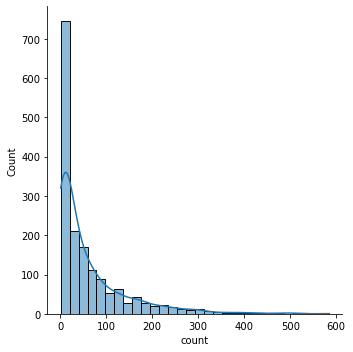

In [25]:
sns.displot(data=ratings_count, x='count', bins=30, kde=True)

# Need some threshold filter
np.sum(ratings_count['count'] > 50), np.sum(ratings_count['count'] > 75), np.sum(ratings_count['count'] > 100)

In [26]:
ratings_count.sort_values(by='count', ascending=False).head()

,count,mean
title,,
Star Wars (1977),584,4.359589
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701


In [27]:
pop_movies = ratings_count[ratings_count['count'] > 75].index
ratings_mat_pop = ratings_mat[pop_movies]
ratings_mat_pop.shape          # down from (944, 1664) to (944, 436)

(944, 436)

In [28]:
similar_movies = ratings_mat_pop.corrwith(movie_rating)
similar_movies.dropna()
df = pd.DataFrame(similar_movies, columns=['correlation'])
df.sort_values(by='correlation', ascending=False).head(10)

# Makes more sense

,correlation
title,
Star Wars (1977),1.000000
"Empire Strikes Back, The (1980)",0.748353
Return of the Jedi (1983),0.672556
Raiders of the Lost Ark (1981),0.536117
Austin Powers: International Man of Mystery (1997),0.377433
"Sting, The (1973)",0.367538
Indiana Jones and the Last Crusade (1989),0.350107
Pinocchio (1940),0.347868
Shadowlands (1993),0.332941


In [29]:
def similar_movies_to(movie, thresh=100, n=5):
    '''
    thresh = minimum # of reviews per movie
    n = number of recommendations to be displayed
    '''
    
    pop_movies = list(ratings_mat.columns[ratings_mat.count(axis=0) > thresh])
    print(type(pop_movies))
    if movie in pop_movies:
        pop_movies.remove(movie)
        movie_rating = ratings_mat[movie]
        ratings_mat_pop = ratings_mat[pop_movies]
        print(ratings_mat_pop.shape)
        similar_movies = ratings_mat_pop.corrwith(movie_rating)
        df = pd.DataFrame(similar_movies.dropna(), columns=['correlation']).sort_values(by='correlation', ascending=False)
        display(df.head(n))
    else:
        print('Movie not listed or has too few ratings')

In [30]:
similar_movies_to('Return of the Jedi (1983)')

<class 'list'>
(944, 332)


,correlation
title,
"Empire Strikes Back, The (1980)",0.721229
Star Wars (1977),0.672556
Raiders of the Lost Ark (1981),0.467391
Indiana Jones and the Last Crusade (1989),0.422294
Sneakers (1992),0.412559


In [31]:
similar_movies_to('Raiders of the Lost Ark (1981)', thresh=120, n=10)

<class 'list'>
(944, 278)


,correlation
title,
Indiana Jones and the Last Crusade (1989),0.539606
"Empire Strikes Back, The (1980)",0.538659
Star Wars (1977),0.536117
Back to the Future (1985),0.506807
"Firm, The (1993)",0.490823
Return of the Jedi (1983),0.467391
Braveheart (1995),0.458854
Field of Dreams (1989),0.424938
Sleepless in Seattle (1993),0.420184


### Movie suggestions for specific user -  converting movie correlation to user-specific rating

In [32]:
user_rating = ratings_mat.loc[0].dropna()
user_rating

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

In [33]:
movie_corr = ratings_mat.corr(method='spearman', min_periods=75)  #100 common data-points b/w pair of vetors
movie_corr.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.211046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# go through the list of movies a particular user has rated
# find other movies correlated to that one
# scale the correlations by user's rating for the original movie

def item_based_suggestion(user_id, ratings_mat=ratings_mat):
    sim_candidates = pd.Series(dtype='float64')
    user_rating = ratings_mat.loc[user_id].dropna()
    movie_corr  = ratings_mat.corr(method='spearman', min_periods=75)
    
    for i in range(len(user_rating)):
#         print('adding sims for ', user_rating.index[i], '...')
        try:
            sims = movie_corr[user_rating.index[i]].dropna()
            sims = sims.map(lambda x: x*user_rating[i])
            sim_candidates = sim_candidates.append(sims)
        except:
            pass
    
    sim_candidates = sim_candidates.groupby(sim_candidates.index).mean()
    print(len(sim_candidates))
    sim_candidates = sim_candidates.drop(user_rating.index, errors='ignore')

    print('Sorting...')
    sim_candidates.sort_values(inplace=True, ascending=False)
    print(sim_candidates.head(10))

In [35]:
item_based_suggestion(0)

# Pearson:
# Return of the Jedi (1983)                             2.392724
# Austin Powers: International Man of Mystery (1997)    1.887164
# Raiders of the Lost Ark (1981)                        1.839900
# Bridge on the River Kwai, The (1957)                  1.683308
# Frighteners, The (1996)                               1.663647
# Cinderella (1950)                                     1.622706
# Mystery Science Theater 3000: The Movie (1996)        1.509047
# Dumbo (1941)                                          1.490822
# Star Trek: The Wrath of Khan (1982)                   1.484040
# Batman (1989)                                         1.473783

# Spearman:
# Return of the Jedi (1983)                             2.194533
# Austin Powers: International Man of Mystery (1997)    1.986254
# Raiders of the Lost Ark (1981)                        1.544721
# Batman (1989)                                         1.506323
# Wrong Trousers, The (1993)                            1.496348
# Singin' in the Rain (1952)                            1.476285
# Swingers (1996)                                       1.470353
# Frighteners, The (1996)                               1.457290
# Dumbo (1941)                                          1.447436
# Star Trek: The Wrath of Khan (1982)                   1.429583

# Spearman AND threshold=50
# Return of the Jedi (1983)                             2.194533
# Philadelphia Story, The (1940)                        1.603430
# Day the Earth Stood Still, The (1951)                 1.560158
# Raiders of the Lost Ark (1981)                        1.544721
# Swingers (1996)                                       1.536395
# Austin Powers: International Man of Mystery (1997)    1.520628
# Gattaca (1997)                                        1.497174
# Frighteners, The (1996)                               1.457290
# Pinocchio (1940)                                      1.448727
# Dumbo (1941)                                          1.447436

# Spearman AND threshold=50 AND remove users with 880+ reviews
# Return of the Jedi (1983)                             2.144380
# Austin Powers: International Man of Mystery (1997)    1.778744
# Sting, The (1973)                                     1.775194
# Star Trek III: The Search for Spock (1984)            1.731611
# Cool Hand Luke (1967)                                 1.709767
# Men in Black (1997)                                   1.668897
# Bridge on the River Kwai, The (1957)                  1.641152
# Lion King, The (1994)                                 1.632076
# Indiana Jones and the Last Crusade (1989)             1.580906
# Star Trek: The Wrath of Khan (1982)                   1.539238

369
Sorting...
Return of the Jedi (1983)                             2.194533
Philadelphia Story, The (1940)                        1.603430
Day the Earth Stood Still, The (1951)                 1.560158
Raiders of the Lost Ark (1981)                        1.544721
Swingers (1996)                                       1.536395
Austin Powers: International Man of Mystery (1997)    1.520628
Gattaca (1997)                                        1.497174
Frighteners, The (1996)                               1.457290
Pinocchio (1940)                                      1.448727
Dumbo (1941)                                          1.447436
dtype: float64


90th percentile =  881.2500000000003


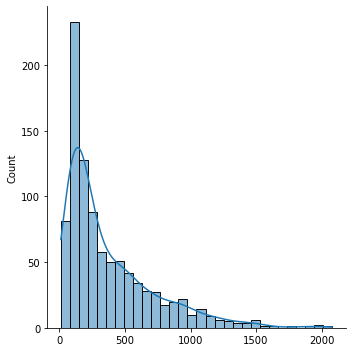

In [36]:
sns.displot(ratings_mat.sum(axis=1), kde=True, bins=30)
print('90th percentile = ',np.percentile(ratings_mat.sum(axis=1), 90))

In [37]:
ratings_mat_1 = ratings_mat.drop(ratings_mat[ratings_mat.sum(axis=1)>880].index)
ratings_mat[ratings_mat.sum(axis=1)>880].index

Int64Index([  1,   7,  13,  18,  59,  85,  90,  92,  94,  95, 130, 145, 151,
            178, 184, 194, 201, 222, 234, 268, 269, 271, 276, 279, 280, 286,
            291, 293, 299, 301, 303, 308, 311, 312, 313, 314, 327, 328, 334,
            339, 343, 363, 374, 378, 385, 387, 389, 393, 399, 405, 406, 416,
            417, 429, 435, 437, 450, 457, 472, 474, 497, 504, 506, 524, 532,
            537, 551, 561, 592, 606, 642, 648, 650, 655, 666, 682, 716, 727,
            747, 749, 758, 796, 804, 805, 846, 864, 870, 880, 883, 889, 892,
            894, 896, 916, 932],
           dtype='int64', name='user_id')

In [38]:
item_based_suggestion(0, ratings_mat_1)

214
Sorting...
Return of the Jedi (1983)                             2.144380
Austin Powers: International Man of Mystery (1997)    1.778744
Sting, The (1973)                                     1.775194
Star Trek III: The Search for Spock (1984)            1.731611
Cool Hand Luke (1967)                                 1.709767
Men in Black (1997)                                   1.668897
Bridge on the River Kwai, The (1957)                  1.641152
Lion King, The (1994)                                 1.632076
Indiana Jones and the Last Crusade (1989)             1.580906
Star Trek: The Wrath of Khan (1982)                   1.539238
dtype: float64


In [39]:
item_based_suggestion(4)

385
Sorting...
I Know What You Did Last Summer (1997)           1.755049
Scream 2 (1997)                                  1.665894
Philadelphia Story, The (1940)                   1.603430
Michael (1996)                                   1.451125
Frighteners, The (1996)                          1.362763
Romy and Michele's High School Reunion (1997)    1.353934
Craft, The (1996)                                1.323714
Con Air (1997)                                   1.304051
Shine (1996)                                     1.278813
Young Guns (1988)                                1.238696
dtype: float64


## Comparison of output

In [40]:
# Movies seen by User #1
user_mat.loc[:,1].dropna().sort_values(ascending=False).head(10)

title
Kids in the Hall: Brain Candy (1996)      5.0
Crumb (1994)                              5.0
Good, The Bad and The Ugly, The (1966)    5.0
Godfather, The (1972)                     5.0
Raiders of the Lost Ark (1981)            5.0
Gattaca (1997)                            5.0
Remains of the Day, The (1993)            5.0
Full Monty, The (1997)                    5.0
Return of the Jedi (1983)                 5.0
Ridicule (1996)                           5.0
Name: 1, dtype: float64

In [41]:
user_based_suggestion(1)

title
Underground (1995)                                                    2.369871
Faust (1994)                                                          2.281785
Vanya on 42nd Street (1994)                                           2.270301
Little Princess, A (1995)                                             2.212851
Burnt By the Sun (1994)                                               2.210534
Withnail and I (1987)                                                 2.210534
Notorious (1946)                                                      2.209642
Double vie de Véronique, La (Double Life of Veronique, The) (1991)    2.193842
Stranger, The (1994)                                                  2.193698
Secrets & Lies (1996)                                                 2.192489
dtype: float64


In [42]:
item_based_suggestion(1)

406
Sorting...
Chain Reaction (1996)            2.132885
Michael Collins (1996)           1.553281
Phantom, The (1996)              1.393934
Mulholland Falls (1996)          1.367652
Scream 2 (1997)                  1.313688
Cliffhanger (1993)               1.297683
Craft, The (1996)                1.279010
Down Periscope (1996)            1.210009
Arrival, The (1996)              1.134843
Miracle on 34th Street (1994)    1.117766
dtype: float64
